<a href="https://colab.research.google.com/github/yuuto52925goal/inspo_categorize/blob/main/deepfashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#Creating a dataset
import os
import pandas as pd
import cv2
from tqdm import tqdm

IMAGE_DIR = "/content/drive/My Drive/Jobs/DeepFashion/"
ANNOTATION_DIR = "/content/drive/My Drive/Jobs/DeepFashion/Anno/"
OUTPUT_DIR = "/content/drive/My Drive/Jobs/DeepFashion/yolo_dataset/"

for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(OUTPUT_DIR, "images", split), exist_ok=True)
    os.makedirs(os.path.join(OUTPUT_DIR, "labels", split), exist_ok=True)

def process_split(split, limit=100):
    image_list_file = os.path.join(ANNOTATION_DIR, f"{split}.txt")
    bbox_file = os.path.join(ANNOTATION_DIR, f"{split}_bbox.txt")

    # Load image filenames
    with open(image_list_file, "r") as f:
        image_files = [line.strip() for line in f.readlines()] #Able to add a limit

    # Load bounding boxes
    bbox_df = pd.read_csv(bbox_file, delim_whitespace=True, header=None, names=["x1", "y1", "x2", "y2"])
    bbox_df = bbox_df  # Able to add Limit to 100

    # Ensure number of images matches bounding boxes
    assert len(image_files) == len(bbox_df), f"Mismatch in {split}: {len(image_files)} images vs {len(bbox_df)} bboxes"

    # Process each image
    for i in tqdm(range(len(image_files)), desc=f"Processing {split} set"):
        img_name = image_files[i]
        x1, y1, x2, y2 = bbox_df.iloc[i]

        img_path = os.path.join(IMAGE_DIR, img_name)
        if not os.path.exists(img_path):
            print(f"Missing image: {img_path}")
            continue  # Skip missing images

        img = cv2.imread(img_path)
        h, w, _ = img.shape

        x_center = (x1 + x2) / (2 * w)
        y_center = (y1 + y2) / (2 * h)
        width = (x2 - x1) / w
        height = (y2 - y1) / h

        img_dest = os.path.join(OUTPUT_DIR, "images", split, os.path.basename(img_name))
        os.system(f"cp '{img_path}' '{img_dest}'")

        label_path = os.path.join(OUTPUT_DIR, "labels", split, os.path.basename(img_name).replace('.jpg', '.txt'))
        with open(label_path, 'w') as f:
            f.write(f"0 {x_center} {y_center} {width} {height}\n")

for split in ["train", "val", "test"]:
    process_split(split, limit=1000)

print("✅ Sample YOLO dataset conversion complete!")

<ipython-input-2-2c58e41ab4cc>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bbox_df = pd.read_csv(bbox_file, delim_whitespace=True, header=None, names=["x1", "y1", "x2", "y2"])
Processing train set: 100%|██████████| 14000/14000 [1:10:57<00:00,  3.29it/s]
<ipython-input-2-2c58e41ab4cc>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bbox_df = pd.read_csv(bbox_file, delim_whitespace=True, header=None, names=["x1", "y1", "x2", "y2"])
Processing val set: 100%|██████████| 2000/2000 [08:50<00:00,  3.77it/s]
<ipython-input-2-2c58e41ab4cc>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bbox_df = pd.read_csv(bbox_file, delim_whitespace=True, header=None, names=["x1", "y1", "x2", "y2"])
Processing

✅ Sample YOLO dataset conversion complete!


In [ ]:
#Getting ready for yolo
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
#Train and save the model in google drive
import os
model = YOLO('yolov8n.pt')  # Load YOLO model
if os.path.exists('/content/drive/My Drive/Jobs/DeepFashion/yolo_dataset/clothes.yaml'):
  #update
  model.train(data='/content/drive/My Drive/Jobs/DeepFashion/yolo_dataset/clothes.yaml', epochs=20)

import shutil

# Define paths
source_best = "runs/detect/train/weights/best.pt"
source_last = "runs/detect/train/weights/last.pt"
destination_folder = "/content/drive/My Drive/Jobs/DeepFashion/"

# Copy best model
shutil.copy(source_best, destination_folder + "yolov8_best.pt")

# Copy last model
shutil.copy(source_last, destination_folder + "yolov8_last.pt")

print("Models saved to Google Drive successfully!")

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Jobs/DeepFashion/yolo_dataset/clothes.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning /content/drive/My Drive/Jobs/DeepFashion/yolo_dataset/labels/train.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/Jobs/DeepFashion/yolo_dataset/labels/val.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.668      2.758      2.114         17        640: 100%|██████████| 10/10 [02:16<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.44s/it]

                   all        120        120    0.00331      0.992       0.55      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.496      2.079       1.85         21        640: 100%|██████████| 10/10 [02:08<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.58s/it]

                   all        120        120    0.00331      0.992      0.548      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.431      1.864      1.769         18        640: 100%|██████████| 10/10 [02:11<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.66s/it]

                   all        120        120      0.312      0.842      0.661      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.394       1.74      1.755         18        640: 100%|██████████| 10/10 [02:13<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.61s/it]

                   all        120        120       0.71      0.467      0.622      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.466      1.797      1.807         11        640: 100%|██████████| 10/10 [02:14<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:32<00:00,  8.02s/it]

                   all        120        120      0.424      0.133      0.164     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.319      1.596      1.634         19        640: 100%|██████████| 10/10 [02:10<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.55s/it]

                   all        120        120      0.473      0.367       0.33      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.454      1.632      1.721         14        640: 100%|██████████| 10/10 [02:09<00:00, 12.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.51s/it]

                   all        120        120      0.392        0.4      0.339      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.357      1.551       1.69         13        640: 100%|██████████| 10/10 [02:08<00:00, 12.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.52s/it]

                   all        120        120      0.352      0.425      0.332      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.392      1.628      1.752         16        640: 100%|██████████| 10/10 [02:07<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.50s/it]

                   all        120        120      0.554      0.483      0.537      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.421      1.502      1.733         19        640: 100%|██████████| 10/10 [02:09<00:00, 12.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.36s/it]

                   all        120        120      0.656      0.382      0.486       0.21


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.503      2.148       1.99          7        640: 100%|██████████| 10/10 [02:04<00:00, 12.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.59s/it]

                   all        120        120      0.819      0.533      0.665      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.324      1.799      1.841          7        640: 100%|██████████| 10/10 [02:03<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.32s/it]

                   all        120        120      0.658      0.609       0.69      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.286       1.74      1.814          7        640: 100%|██████████| 10/10 [02:05<00:00, 12.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.42s/it]

                   all        120        120      0.634      0.562       0.63      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.299      1.645        1.8          7        640: 100%|██████████| 10/10 [02:06<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.61s/it]

                   all        120        120      0.626      0.508      0.487      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.263      1.566      1.759          7        640: 100%|██████████| 10/10 [02:03<00:00, 12.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.42s/it]

                   all        120        120      0.674      0.533      0.583      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.227      1.471      1.762          7        640: 100%|██████████| 10/10 [02:07<00:00, 12.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.40s/it]

                   all        120        120      0.798      0.658      0.732      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.175      1.475      1.661          7        640: 100%|██████████| 10/10 [02:06<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.59s/it]

                   all        120        120      0.736      0.667       0.71      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.124      1.416      1.639          7        640: 100%|██████████| 10/10 [02:08<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.50s/it]

                   all        120        120      0.715      0.683        0.7        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.079      1.352      1.585          7        640: 100%|██████████| 10/10 [02:06<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.44s/it]

                   all        120        120      0.745      0.792      0.777      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.093      1.328      1.636          7        640: 100%|██████████| 10/10 [02:04<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.51s/it]

                   all        120        120       0.79      0.783      0.805       0.46



20 epochs completed in 0.886 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:27<00:00,  6.99s/it]


                   all        120        120      0.789       0.78      0.805       0.46
Speed: 2.1ms preprocess, 210.0ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train5
Models saved to Google Drive successfully!



image 1/1 /content/drive/My Drive/Jobs/Test/Screenshot 2025-02-03 at 12.10.13 PM.png: 640x448 (no detections), 256.8ms
Speed: 4.9ms preprocess, 256.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train3


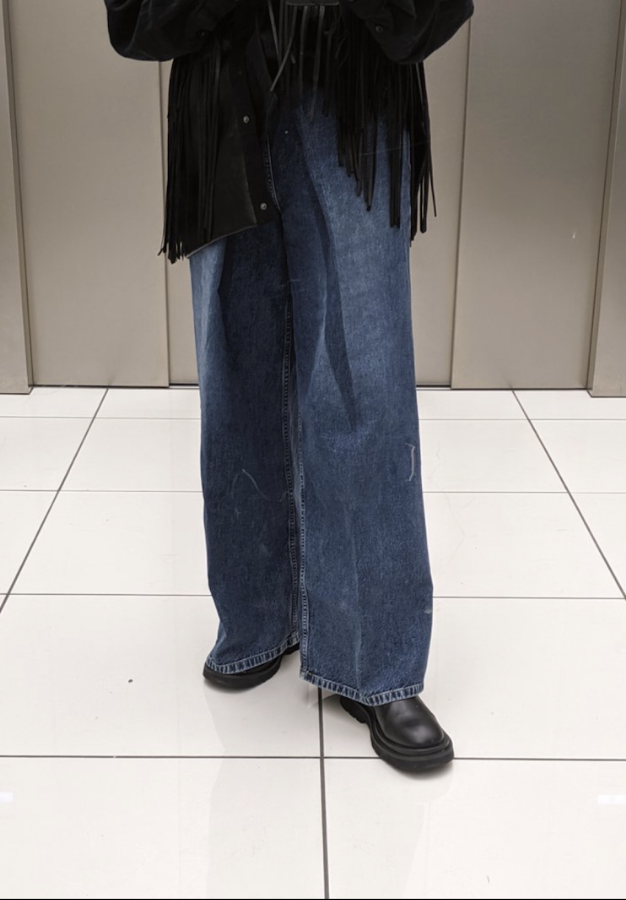

In [ ]:
#Test1
results = model('/content/drive/My Drive/Jobs/Test/Screenshot 2025-02-03 at 12.10.13 PM.png', save=True, conf=0.2)
results[0].show()

In [ ]:
!pip install firebase-admin
import firebase_admin
from firebase_admin import credentials, storage
import os

In [ ]:
#Save to google storage
cred = credentials.Certificate("inspo-mobile-app-service.json")
firebase_admin.initialize_app(cred)


ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [ ]:

bucket = storage.bucket("inspo-mobile-app.firebasestorage.app")
blob = bucket.blob("models/yolov8_best.pt")
blob.upload_from_filename("/content/drive/My Drive/Jobs/DeepFashion/yolov8_best.pt")

print("Model uploaded to Firebase successfully!")

Model uploaded to Firebase successfully!


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Model loaded successfully!

image 1/1 /content/drive/My Drive/Jobs/Test/Screenshot 2025-02-03 at 12.10.13 PM.png: 640x448 2 Clothess, 164.0ms
Speed: 5.3ms preprocess, 164.0ms inference, 14.2ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict2


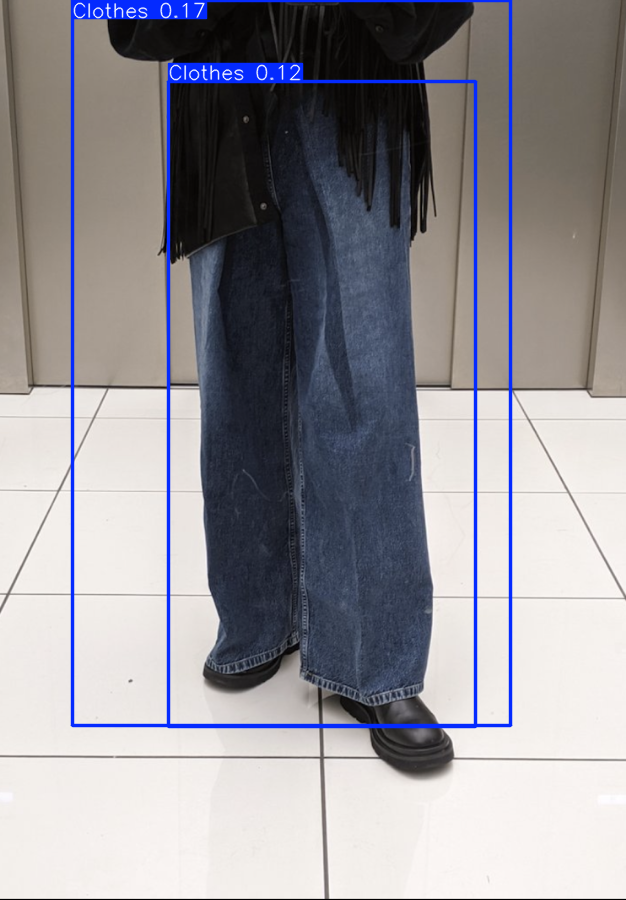

In [ ]:
from ultralytics import YOLO

# Path to the model stored in Google Drive
model_path = "/content/drive/My Drive/Jobs/DeepFashion/yolov8_best.pt"

# Load the model
model = YOLO(model_path)

print("Model loaded successfully!")

results = model('/content/drive/My Drive/Jobs/Test/Screenshot 2025-02-03 at 12.10.13 PM.png', save=True, conf=0.1)
results[0].show()


image 1/1 /content/drive/My Drive/Jobs/Crop/images/train/image8.jpg: 640x320 2 Clothess, 125.6ms
Speed: 3.2ms preprocess, 125.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict2


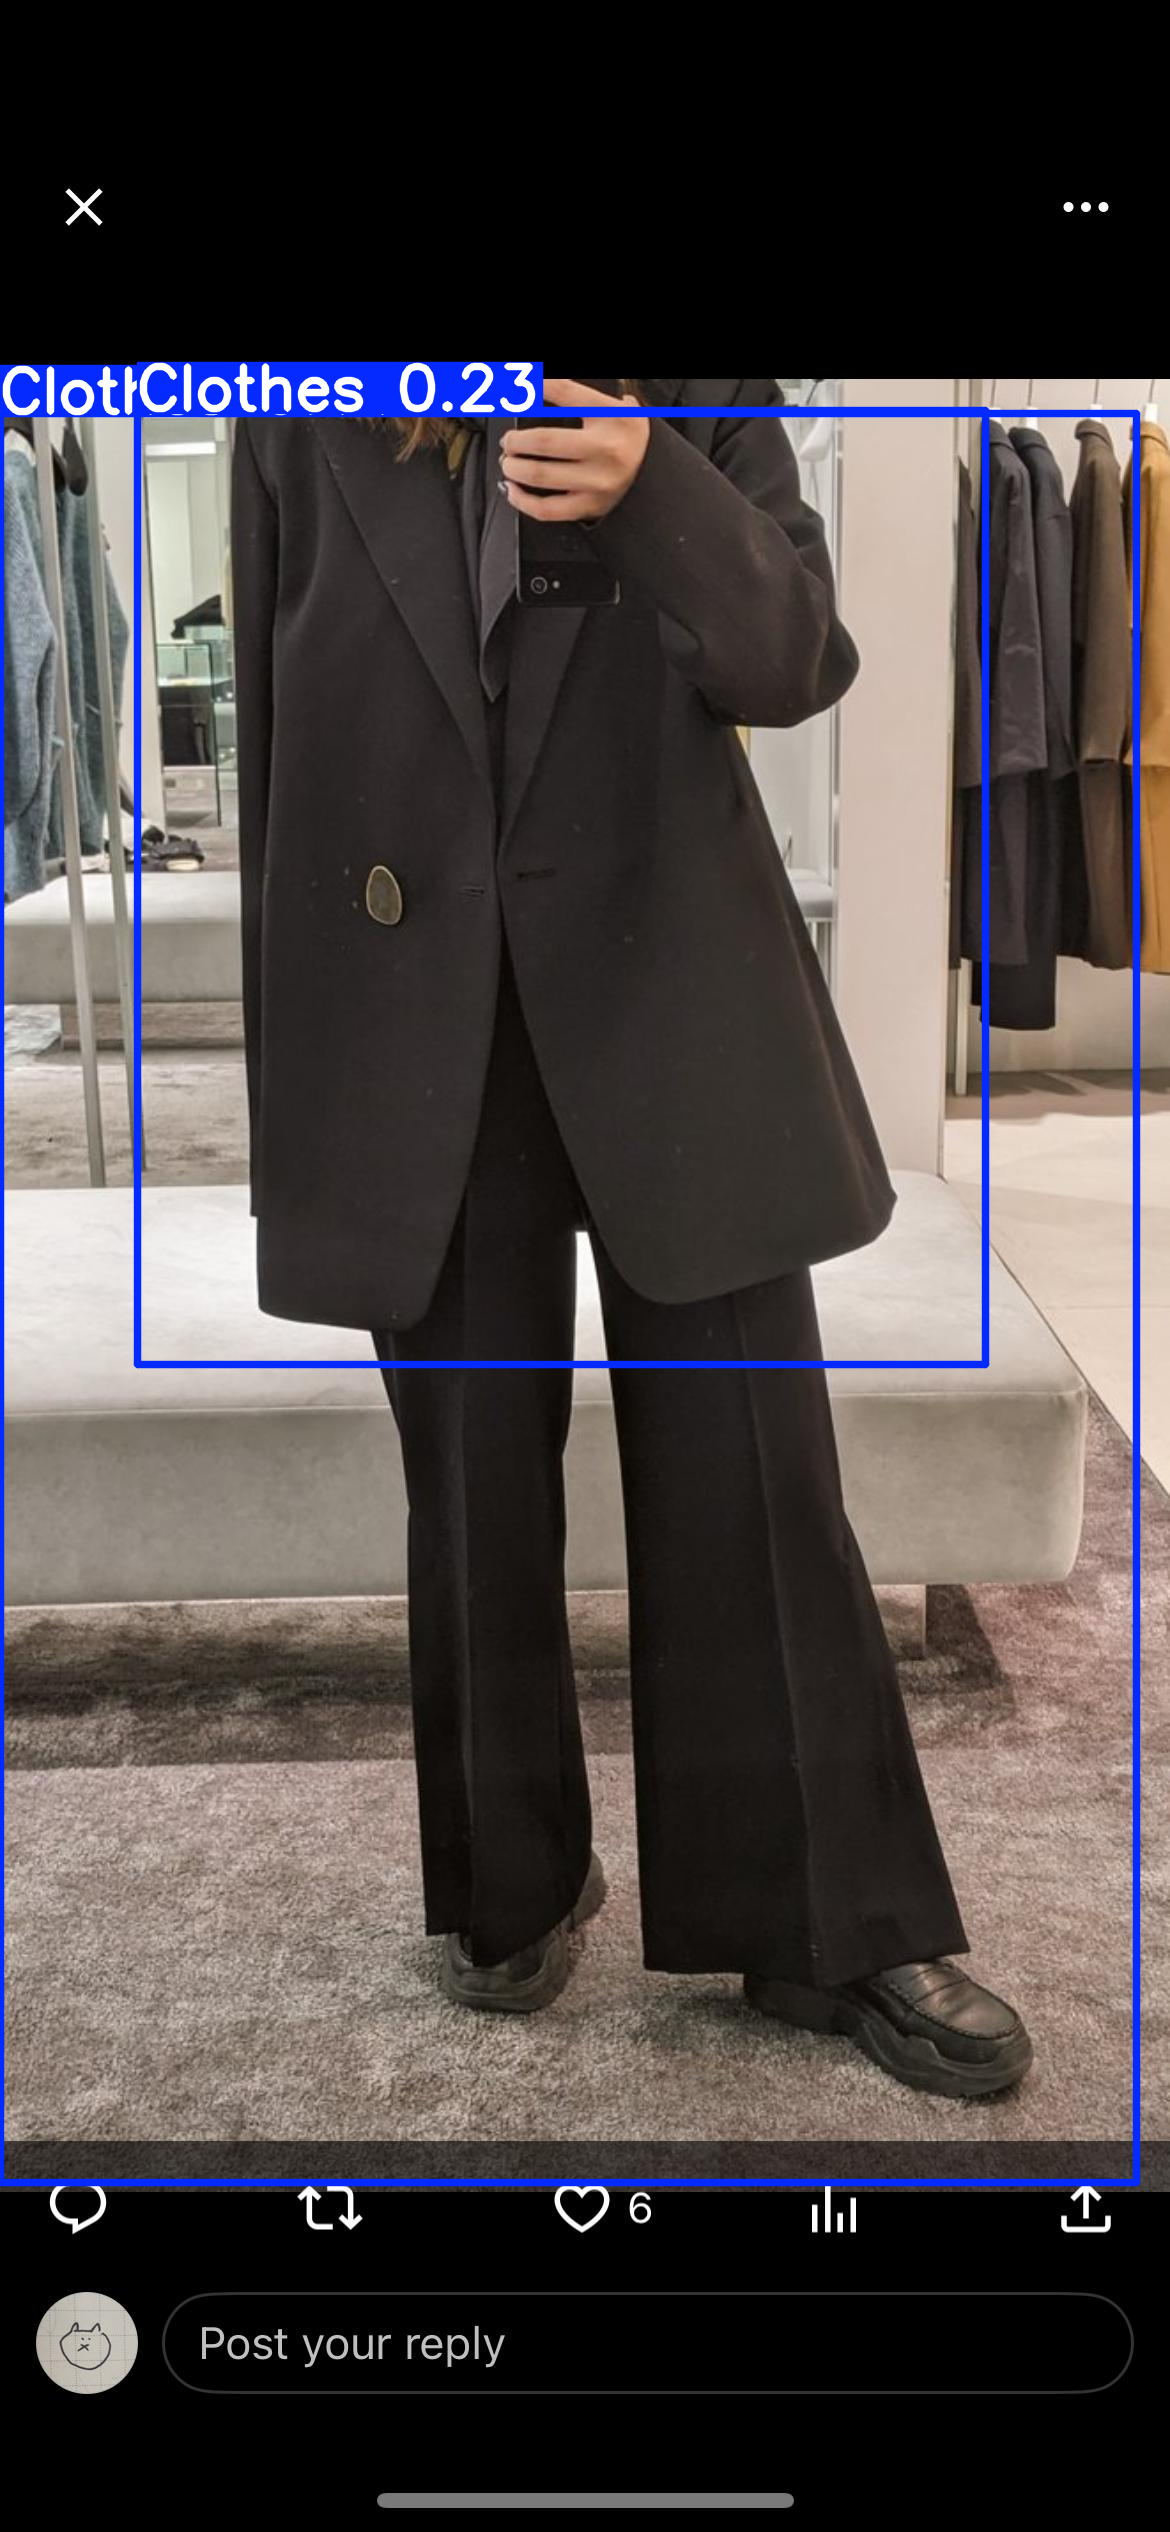

In [ ]:
# results = model('/content/drive/My Drive/Jobs/Test/Screenshot 2025-02-03 at 12.10.13 PM.png', save=True, conf=0.1)
# results[0].show()
results = model('/content/drive/My Drive/Jobs/Crop/images/train/image8.jpg', save=True, conf=0.1)
results[0].show()


image 1/1 /content/drive/My Drive/Jobs/Crop/images/train/image9.jpg: 640x384 2 Clothess, 252.5ms
Speed: 10.1ms preprocess, 252.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2


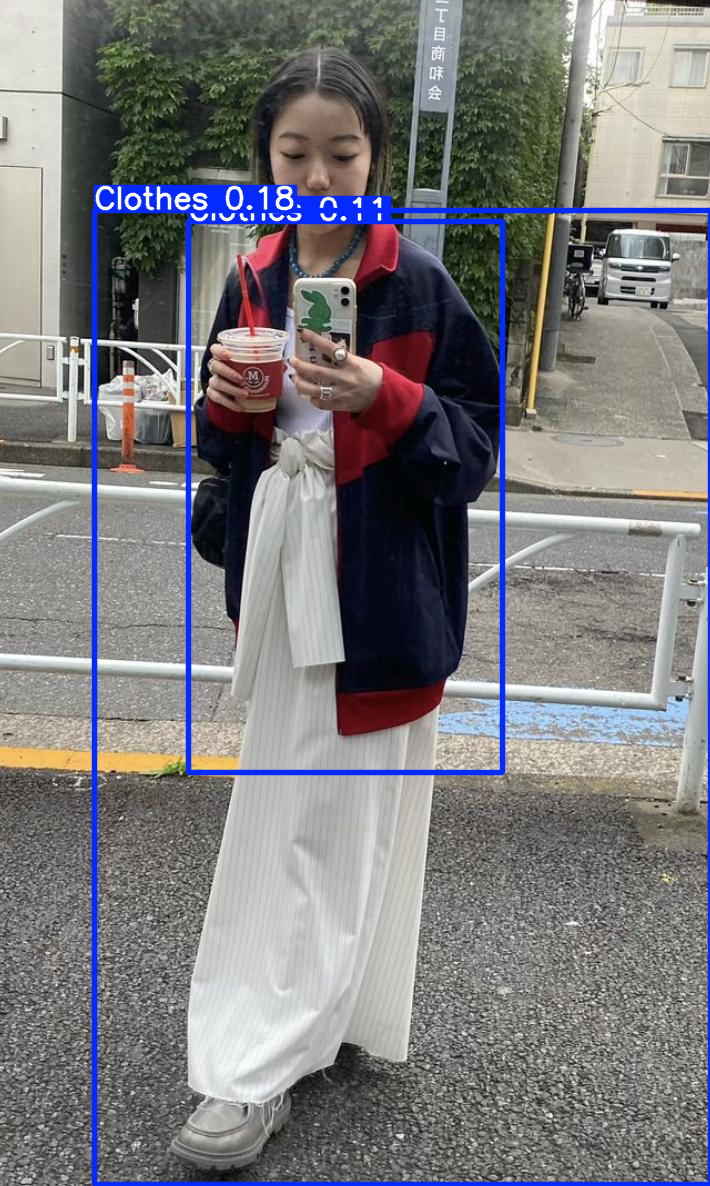

In [ ]:
results = model('/content/drive/My Drive/Jobs/Crop/images/train/image9.jpg', save=True, conf=0.1)
results[0].show()